# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)
plt.rcParams["axes.grid"] = False
plt.style.use('dark_background')
%matplotlib inline

# Load Dataset

In [ ]:
# links = pd.read_csv('/content/drive/MyDrive/ml-latest-small/links.csv')
movies = pd.read_csv('/content/drive/MyDrive/ml-latest-small/movies.csv')
rating = pd.read_csv('/content/drive/MyDrive/ml-latest-small/ratings.csv')
# tag = pd.read_csv('/content/drive/MyDrive/ml-latest-small/tags.csv')

# exploratory data analysis(movie data set)

In [ ]:
movies.head()

movieId  ...                                       genres
0        1  ...  Adventure|Animation|Children|Comedy|Fantasy
1        2  ...                   Adventure|Children|Fantasy
2        3  ...                               Comedy|Romance
3        4  ...                         Comedy|Drama|Romance
4        5  ...                                       Comedy

[5 rows x 3 columns]

In [ ]:
#columns
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [ ]:
# check shape of two data set (movies & rating)
print(f'shape of movie : {movies.shape}')

shape of movie : (9742, 3)


In [ ]:
# information of movie dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
# check missing value
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
# value counts for movie titles
movies.title.value_counts()

Confessions of a Dangerous Mind (2002)                           2
Saturn 3 (1980)                                                  2
Eros (2004)                                                      2
Emma (1996)                                                      2
War of the Worlds (2005)                                         2
                                                                ..
Santa Claus Is a Stinker (Le Père Noël est une ordure) (1982)    1
Other Boleyn Girl, The (2008)                                    1
Changing Lanes (2002)                                            1
Tortilla Soup (2001)                                             1
You, Me and Dupree (2006)                                        1
Name: title, Length: 9737, dtype: int64

In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
from pandas_profiling import ProfileReport


powerfull EDA tools : pandas profile

In [ ]:
ProfileReport(movies)

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
prof = ProfileReport(movies)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# exploratory data analysis(rating dataset)

In [ ]:
print(f'shape of rating : {rating.shape}')

shape of rating : (100836, 4)


In [ ]:
rating.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [ ]:
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

let's user pandas profiling tool for EDA

In [ ]:
ProfileReport(rating)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
prof = ProfileReport(rating)
prof.to_file(output_file='rating.html')

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# now let's merge two datafram into unique dataframe and get some EDA

In [ ]:
movies.head()

movieId  ...                                       genres
0        1  ...  Adventure|Animation|Children|Comedy|Fantasy
1        2  ...                   Adventure|Children|Fantasy
2        3  ...                               Comedy|Romance
3        4  ...                         Comedy|Drama|Romance
4        5  ...                                       Comedy

[5 rows x 3 columns]

In [ ]:
movie_df = movies.iloc[:,:2]
movie_df.head()

movieId                               title
0        1                    Toy Story (1995)
1        2                      Jumanji (1995)
2        3             Grumpier Old Men (1995)
3        4            Waiting to Exhale (1995)
4        5  Father of the Bride Part II (1995)

In [ ]:
movie_df.dtypes

movieId     int64
title      object
dtype: object

In [ ]:
# change dtypes 
movie_df['movieId'] = movie_df.movieId.astype('int32')
movie_df['title'] = movie_df.title.astype('str')
movie_df.dtypes

movieId     int32
title      object
dtype: object

In [ ]:
{'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

SyntaxError: ignored

In [ ]:
rating.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [ ]:
rating.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [ ]:
rating['userId'] = rating['userId'].astype('int32')
rating['movieId'] = rating['movieId'].astype('int32')
rating['rating'] = rating['rating'].astype('float32')
rating.dtypes

userId         int32
movieId        int32
rating       float32
timestamp      int64
dtype: object

In [ ]:
movie_df.isnull().sum()

movieId    0
title      0
dtype: int64

In [ ]:
rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
print("Movies:",movie_df.shape)
print("Ratings:",rating.shape)

Movies: (9742, 2)
Ratings: (100836, 4)


In [ ]:
movies_merged_df=movie_df.merge(rating, on='movieId')
movies_merged_df.head()

movieId             title  userId  rating   timestamp
0        1  Toy Story (1995)       1     4.0   964982703
1        1  Toy Story (1995)       5     4.0   847434962
2        1  Toy Story (1995)       7     4.5  1106635946
3        1  Toy Story (1995)      15     2.5  1510577970
4        1  Toy Story (1995)      17     4.5  1305696483

In [ ]:
movies_merged_df=movies_merged_df.dropna(axis = 0, subset = ['title'])
movies_merged_df.head()

movieId             title  userId  rating   timestamp
0        1  Toy Story (1995)       1     4.0   964982703
1        1  Toy Story (1995)       5     4.0   847434962
2        1  Toy Story (1995)       7     4.5  1106635946
3        1  Toy Story (1995)      15     2.5  1510577970
4        1  Toy Story (1995)      17     4.5  1305696483

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
ProfileReport(movies_merged_df)

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
ProfileReport(movies_merged_df).to_file('EDA_df.html')

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
movies_average_rating=movies_merged_df.groupby('title')['rating'].mean()\
            .sort_values(ascending=False).reset_index().rename(columns={'rating':'Average Rating'})\
          movies_average_rating.head()

title  Average Rating
0                         Karlson Returns (1970)             5.0
1                Winter in Prostokvashino (1984)             5.0
2                                 My Love (2006)             5.0
3              Sorority House Massacre II (1990)             5.0
4  Winnie the Pooh and the Day of Concern (1972)             5.0

In [ ]:
movies_rating_count=movies_merged_df.groupby('title')['rating'].count().sort_values(ascending=True).reset_index()\
                      .rename(columns={'rating':'Rating Count'})\ 
                      movies_rating_count_avg=movies_rating_count.merge(movies_average_rating, on='title')\
                      movies_rating_count_avg.head()

title  ...  Average Rating
0                                         '71 (2014)  ...             4.0
1                                 Latter Days (2003)  ...             3.5
2                             Late Shift, The (1996)  ...             2.5
3  Late Night with Conan O'Brien: The Best of Tri...  ...             2.0
4                         Late Night Shopping (2001)  ...             4.5

[5 rows x 3 columns]



Observation-

   1- Many movies have a pefrect 5 star average rating on a dataset of almost 100k user ratings. This suggests the existence of outliers which we need to further confirm with visualization.<br/>
   2- The presence of single ratings for several movies suggests that I set a threshold value of ratings to produce valuable recommendations



### Data Visualization
 i will focus on creating plots to prove/disprove the observations and analyze the trends in the data (if any)

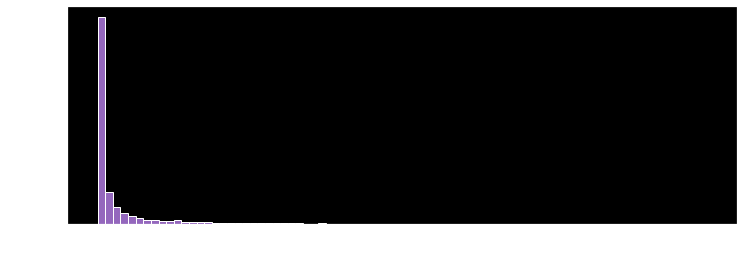

In [ ]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Rating Count'],bins=80,color='tab:purple')
plt.ylabel('Ratings Count(Scaled)', fontsize=16)
plt.savefig('ratingcounthist.jpg')

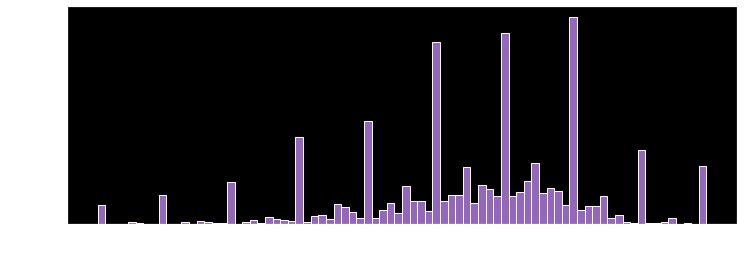

In [ ]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Average Rating'],bins=80,color='tab:purple')
plt.ylabel('Average Rating',fontsize=16)
plt.savefig('avgratinghist.jpg')

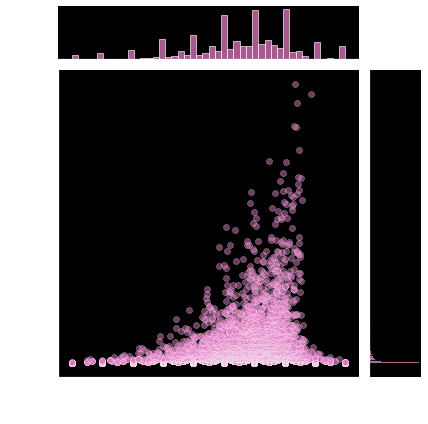

In [ ]:
plot=sns.jointplot(x='Average Rating',y='Rating Count',data=movies_rating_count_avg,alpha=0.5, color='tab:pink')
plot.savefig('joinplot.jpg')



Analysis-

    Plot #1 confirms our observations of a high volume of movies with low ratings count. Apart from setting a threshold, we can also use quantiles at some higher percentile for this usecase.
    Histogram #2 showcases the distribution function of the Average Rating values.
    Joinplot beautifully illustrates that there is only a subset of values with higher rating that have considerable amount of ratings.



### Eliminating Outliers

In [ ]:
rating_with_RatingCount = movies_merged_df.merge(movies_rating_count, left_on = 'title', right_on = 'title', how = 'left')
rating_with_RatingCount.head()


movieId             title  userId  rating   timestamp  Rating Count
0        1  Toy Story (1995)       1   4.000   964982703           215
1        1  Toy Story (1995)       5   4.000   847434962           215
2        1  Toy Story (1995)       7   4.500  1106635946           215
3        1  Toy Story (1995)      15   2.500  1510577970           215
4        1  Toy Story (1995)      17   4.500  1305696483           215

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(rating_with_RatingCount['Rating Count'].describe())

count   100836.000
mean        58.759
std         61.965
min          1.000
25%         13.000
50%         39.000
75%         84.000
max        329.000
Name: Rating Count, dtype: float64


In [ ]:
popularity_threshold = 50
popular_movies= rating_with_RatingCount[rating_with_RatingCount['Rating Count']>=popularity_threshold]
popular_movies.head()


movieId             title  userId  rating   timestamp  Rating Count
0        1  Toy Story (1995)       1   4.000   964982703           215
1        1  Toy Story (1995)       5   4.000   847434962           215
2        1  Toy Story (1995)       7   4.500  1106635946           215
3        1  Toy Story (1995)      15   2.500  1510577970           215
4        1  Toy Story (1995)      17   4.500  1305696483           215

In [ ]:
popular_movies.shape

(41362, 6)

### Pivotting title as indices & userId as columns

In [107]:
movie_features_df=popular_movies.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()
# movie_features_df.to_excel('output.xlsx')

userId                              1     2     3    ...   608   609   610
title                                                ...                  
10 Things I Hate About You (1999) 0.000 0.000 0.000  ... 0.000 0.000 0.000
12 Angry Men (1957)               0.000 0.000 0.000  ... 0.000 0.000 0.000
2001: A Space Odyssey (1968)      0.000 0.000 0.000  ... 3.000 0.000 4.500
28 Days Later (2002)              0.000 0.000 0.000  ... 3.500 0.000 5.000
300 (2007)                        0.000 0.000 0.000  ... 5.000 0.000 4.000

[5 rows x 606 columns]

### Creating kNN Model

In [ ]:
from scipy.sparse import csr_matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)

In [110]:
movie_features_df_matrix

<450x606 sparse matrix of type '<class 'numpy.float32'>'
	with 41360 stored elements in Compressed Sparse Row format>

In [109]:
np.shape(movie_features_df_matrix)

(450, 606)

In [ ]:
movie_features_df.shape

(450, 606)

In [ ]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

158


In [ ]:
movie_features_df.head()

userId                              1     2     3    ...   608   609   610
title                                                ...                  
10 Things I Hate About You (1999) 0.000 0.000 0.000  ... 0.000 0.000 0.000
12 Angry Men (1957)               0.000 0.000 0.000  ... 0.000 0.000 0.000
2001: A Space Odyssey (1968)      0.000 0.000 0.000  ... 3.000 0.000 4.500
28 Days Later (2002)              0.000 0.000 0.000  ... 3.500 0.000 5.000
300 (2007)                        0.000 0.000 0.000  ... 5.000 0.000 4.000

[5 rows x 606 columns]

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))



Recommendations for Fish Called Wanda, A (1988):

1: Full Monty, The (1997), with distance of 0.4647703170776367:
2: Monty Python and the Holy Grail (1975), with distance of 0.4728582501411438:
3: Raising Arizona (1987), with distance of 0.48472416400909424:
4: This Is Spinal Tap (1984), with distance of 0.4880514144897461:
5: Blues Brothers, The (1980), with distance of 0.4938591718673706:


### check RS 

In [ ]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

336


In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Sabrina (1995):

1: Truth About Cats & Dogs, The (1996), with distance of 0.5181437134742737:
2: Mr. Holland's Opus (1995), with distance of 0.5693953037261963:
3: Birdcage, The (1996), with distance of 0.570942759513855:
4: Grumpier Old Men (1995), with distance of 0.5971688032150269:
5: Mission: Impossible (1996), with distance of 0.6042110919952393:
